# EDA on Black Friday Data

In [2]:
import pandas as pd
import numpy as np
import data_describe as dd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv('./Data/train.csv')

In [4]:
data.shape

(550068, 12)

In [5]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
# Percentage of null values
100*data.isnull().sum()[data.isnull().sum()>0]/data.shape[0]

Product_Category_2    31.566643
Product_Category_3    69.672659
dtype: float64

In [7]:
data.drop(labels  = 'User_ID', axis =1 , inplace = True)

In [8]:
data = data.fillna(0)

In [9]:
#summary of the Columns

dd.data_summary(data)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Data Type,object,object,object,int64,object,object,int64,int64,float64,float64,int64
Mean,,,,8.07671,,,0.409653,5.40427,6.73544,3.84194,9263.97
Standard Deviation,,,,6.52266,,,0.49177,3.93621,6.21549,6.25071,5023.07
Median,,,,7,,,0,5,5,0,8047
Min,,,,0,,,0,1,0,0,12
Max,,,,20,,,1,20,18,18,23961
# Zeros,,,,69638,,,324731,0,173638,383247,0
# Nulls,0,0,0,0,0,0,0,0,0,0,0
% Most Frequent Value,0.34,75.31,39.92,13.15,42.03,35.24,59.03,27.44,31.57,69.67,0.03


<AxesSubplot:title={'center':'Data Heatmap'}, xlabel='Record #', ylabel='Variable'>

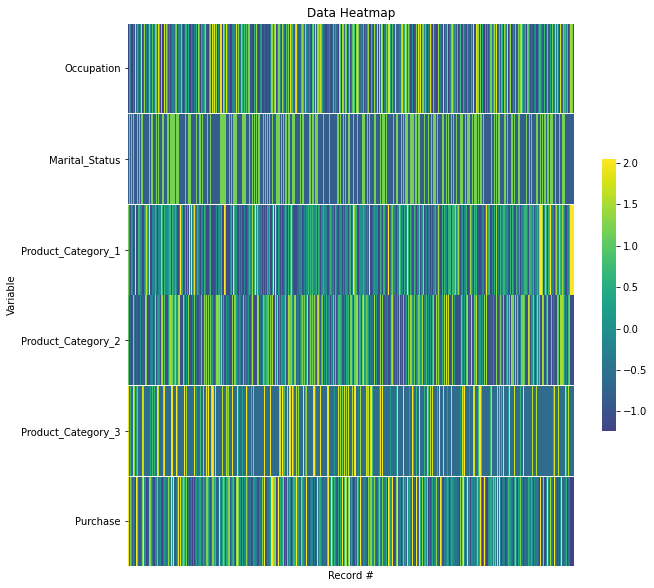

In [10]:
dd.data_heatmap(data)

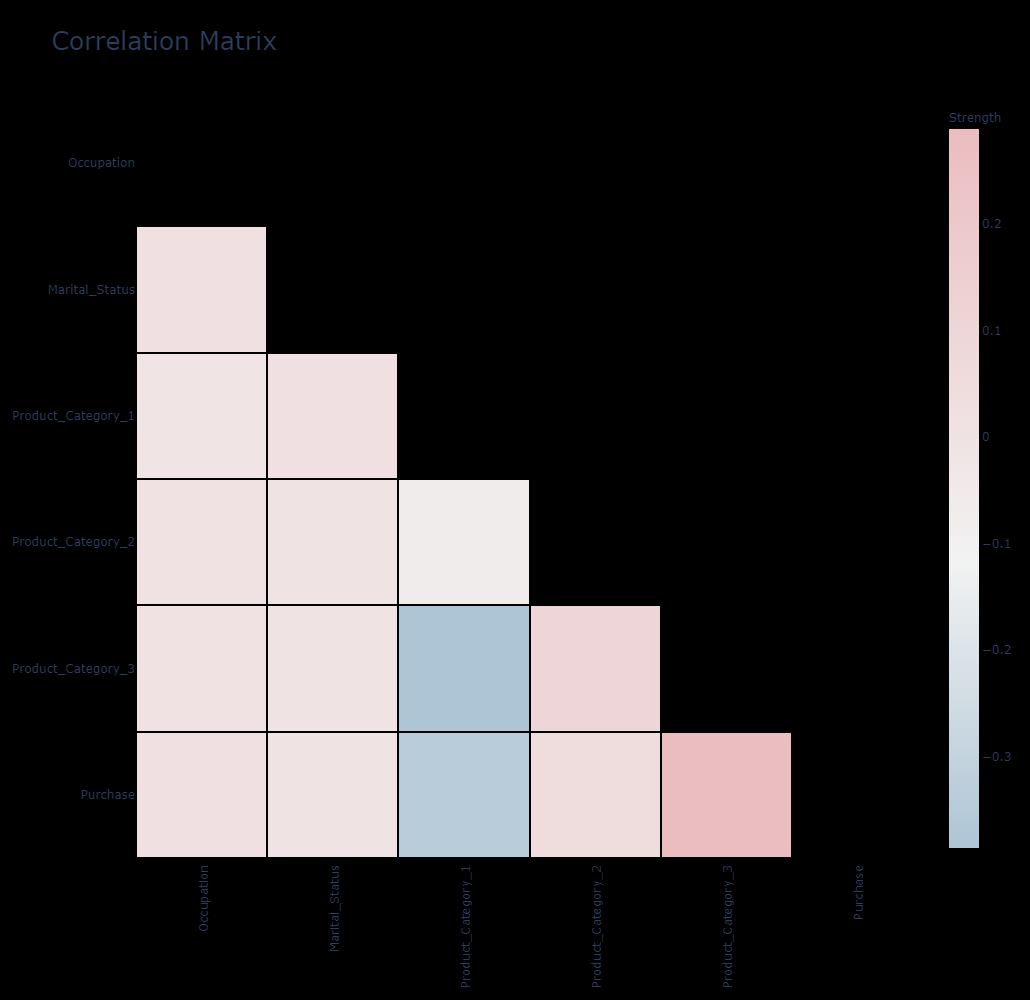

In [11]:
dd.correlation_matrix(data, cluster=False)

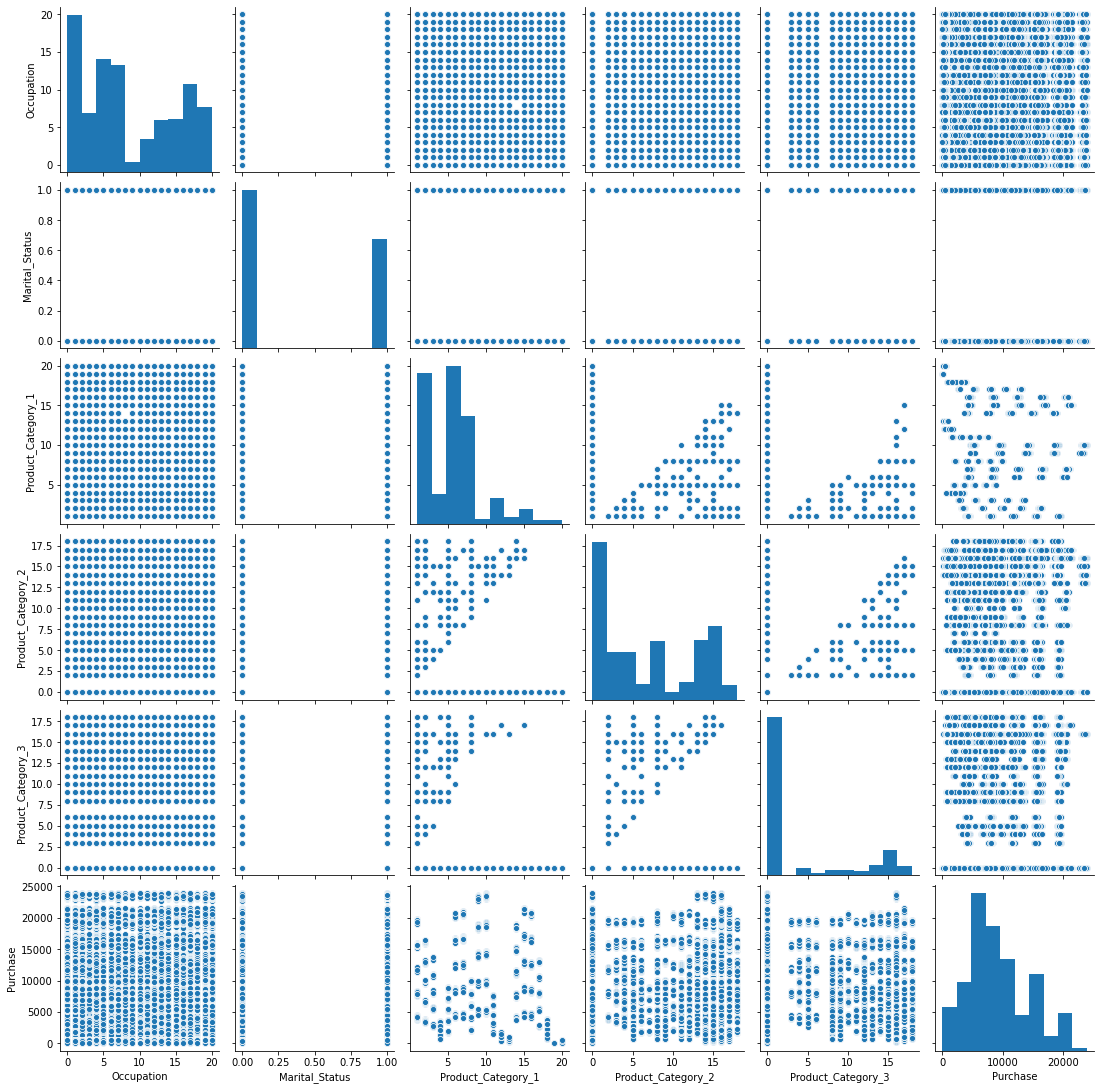

In [13]:
dd.scatter_plots(data, plot_mode='matrix')

<AxesSubplot:xlabel='Purchase'>

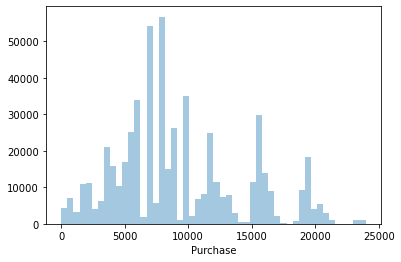

In [14]:
# Purchase Distribution
sns.distplot(data['Purchase'], kde = False)

In [16]:
#Top 10 Products which were popular

data['Product_ID'].value_counts().sort_values(ascending=False).head(10)

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00145042    1406
P00059442    1406
Name: Product_ID, dtype: int64

In [18]:
# Age Group in order of the total purchases made my each group
data.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [20]:
Age_gender = data.groupby(['Age','Gender'])['Purchase'].sum().reset_index()

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

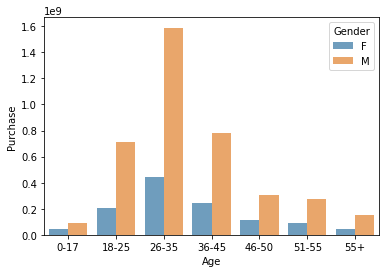

In [22]:
sns.barplot('Age','Purchase',hue='Gender',data=Age_gender, alpha = 0.7)

Age and Gender wise distribution of the over purchases made 

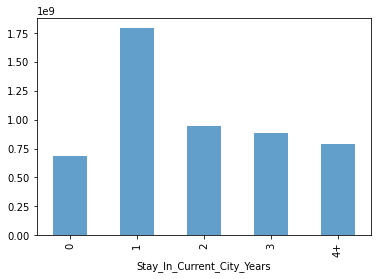

In [29]:
city_year = data.groupby('Stay_In_Current_City_Years').agg({'Purchase':'sum'})
city_year.plot(kind='bar', legend=None, alpha = 0.7);

People who lived at least one year but no more that 2 years in the city tend to visit the store during Black Friday

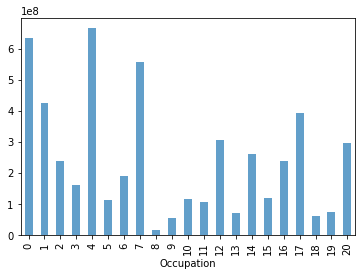

In [28]:
occupation = data.groupby('Occupation').agg({'Purchase':'sum'})
occupation.plot(kind='bar', legend=None, alpha = 0.7);

Occupations 4, 0, and 7 are the biggest spenders. 

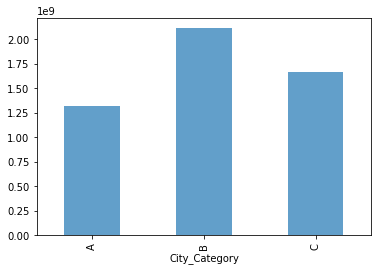

In [30]:
city = data.groupby('City_Category').agg({'Purchase':'sum'})
city.plot(kind='bar', legend=None, alpha = 0.7);

City B is the Highest spending

<AxesSubplot:xlabel='Marital_Status'>

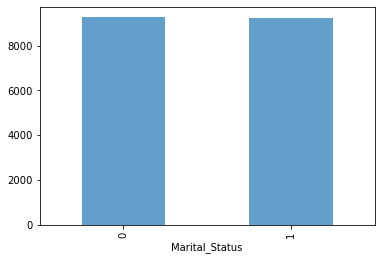

In [32]:
marital_status = data.groupby('Marital_Status').agg({'Purchase':'mean'})
marital_status.plot(kind='bar', legend=None, alpha = 0.7)

Both Marital status Equal speding

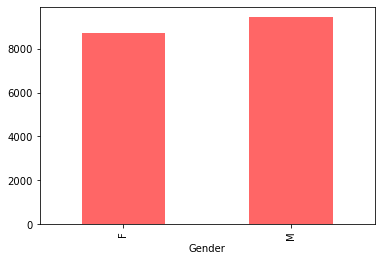

In [38]:
gender_avg = data.groupby('Gender').agg({'Purchase':'mean'})
gender_avg.plot(kind='bar', legend=None, alpha = 0.6, color = ['r', 'b']);

Avg spending of men is more than women